In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [3]:
t0_data = pd.read_csv("DTL0/REU04_table_t0_20220811.csv")
tf_data = pd.read_csv("DTL0/REU04_table_tf_20220811.csv")

exp_info = ['Treatments', 'Rep', 'Time', 'OD']
inputs = ['Inulin', 'Starch', 'Pectin', 'ArGal', 'Gum', 'AmAc', 'pH']
species = ['BAabs', 'BPabs', 'BTabs', 'BUabs', 'PCabs', 'PJabs',
       'ACabs', 'CGabs', 'CHabs', 'FPabs', 'ERabs', 'BHabs', 'RIabs',
       'CSabs', 'EHabs']
species = list(np.array(species)[np.array([False,  True,  True, False, False, False, False, False, False,
        True,  True,  True, False, False, False])])

# data with replicates
reps_data = pd.concat((t0_data[exp_info+inputs+species], tf_data[exp_info+inputs+species]))
rep1_data = reps_data.iloc[reps_data['Rep'].values==1].sort_values(by=['Treatments', 'Time'])
rep2_data = reps_data.iloc[reps_data['Rep'].values==2].sort_values(by=['Treatments', 'Time'])
rep3_data = reps_data.iloc[reps_data['Rep'].values==3].sort_values(by=['Treatments', 'Time'])

# average replicates
avg_data_4 = rep1_data.copy().drop(['Rep'], axis=1)
avg_data_4[species] = (avg_data_4[species].values + rep2_data[species].values + rep3_data[species].values)/3.

In [10]:
t0_inds = np.in1d(avg_data_4.Time.values, 0.) 
X = avg_data_4.iloc[t0_inds][species].values
Y = avg_data_4.iloc[~t0_inds][species].values

In [12]:
rf = RandomForestRegressor()
rf.fit(X,Y)

RandomForestRegressor()

In [13]:
Ypred = rf.predict(X)

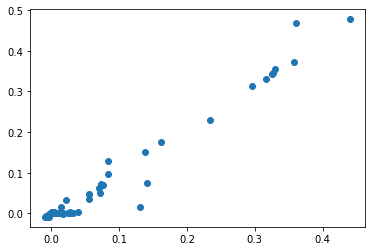

In [17]:
plt.scatter(Ypred.flatten(), Y.flatten())